In [1]:
import pyvisa as visa
#import visa
import time
import numpy as np
import pymeasure
from pymeasure.instruments.keithley import Keithley2400
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import csv

In [2]:
# file_name = "D:/User Data/Cheng Yang/Sam files/_switch/data/20221202_FGT/30000Oe_to_0Oe_10.0Ghz_power10dBm_90.0K_1.csv"
file_name="D:/User Data/Cheng Yang/Sam files/_switch/data/FGT_20221214/YIG_6000Oe_to_0Oe_11.0Ghz_power13.5dBm_300.0K_2.csv"
df = pd.read_csv(file_name)
df.columns = df.columns.str.strip()
df

,field,lockin1X,lockin1Y,lockin1R,lockin2X,lockin2Y,lockin2R
0,6000.41140,0.088940,0.020439,0.091263,-5.769580e-07,1.962770e-07,6.079240e-07
1,6000.62720,0.088940,0.020439,0.091259,-5.515790e-07,2.281750e-07,5.967490e-07
2,6000.59105,0.088936,0.020432,0.091252,-5.664810e-07,7.497190e-08,5.706720e-07
3,6000.65600,0.088936,0.020424,0.091252,-5.355140e-07,-1.355080e-07,5.511140e-07
4,6000.61985,0.088932,0.020420,0.091244,-4.337650e-07,-1.862650e-07,4.686900e-07
...,...,...,...,...,...,...,...
305,81.74990,0.089600,0.020924,0.092011,-1.164160e-08,3.494810e-07,3.476180e-07
306,62.74830,0.089604,0.020939,0.092019,2.777690e-07,1.478480e-07,3.199110e-07
307,41.72815,0.089604,0.020943,0.092022,4.493650e-07,-6.565870e-08,4.549530e-07
308,15.52775,0.089604,0.020947,0.092022,3.615880e-07,-1.708990e-07,3.962800e-07


[9, 10]


<Figure size 432x288 with 0 Axes>

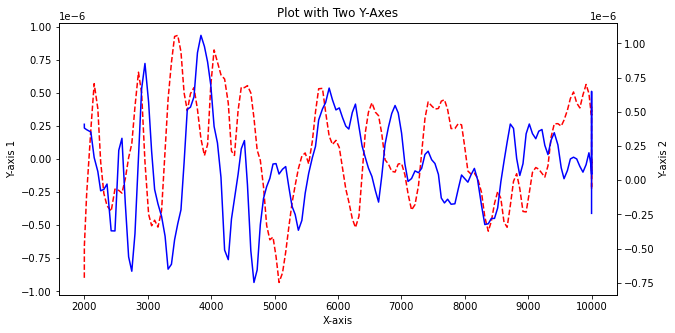

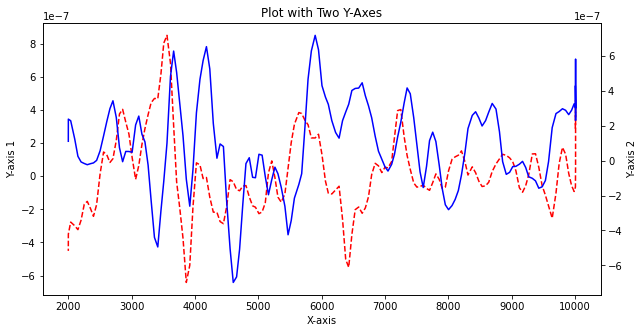

In [84]:
plt.clf()
Temp=220.0
F=list(np.arange(9, 11, 1))
print(F)            
for i in F:
    fieldstart=10000
    fieldend = 2000
    signalgeneratorfre=i*1e9
    power=11.5
    file_name = "D:/User Data/Cheng Yang/Sam files/_switch/data/FGT_20221214/FGT_{}Oe_to_{}Oe_{}Ghz_power{}dBm_{:.1f}K_7.csv".format(fieldstart, fieldend, signalgeneratorfre/1e9, power, np.mean(Temp))
    df = pd.read_csv(file_name)
    df.columns = df.columns.str.strip()
    f= df['field']
    vx1 = df['lockin2X']
    vy2 = df['lockin2Y']
    
    
#     plt.figure()
#     plt.xlabel('field')
#     plt.ylabel('lock1x')
#     plt.plot(f,vx1)
#     plt.show()

    # Create a figure and set its size
    fig, ax1 = plt.subplots(figsize=(10,5))

    # Set the title and labels for the x and y axes on the first subplot
    ax1.set_title("Plot with Two Y-Axes")
    ax1.set_xlabel("X-axis")
    ax1.set_ylabel("Y-axis 1")

    # Plot the first line on the first subplot, with a red dashed line
    ax1.plot(f, vx1, color="red", linestyle="dashed")

    # Create a second y-axis on the right side of the first subplot
    ax2 = ax1.twinx()

    # Set the label for the second y-axis
    ax2.set_ylabel("Y-axis 2")

    # Plot the second line on the second subplot, with a blue solid line
    ax2.plot(f, vy2, color="blue")

    # Add a legend to the figure
#     plt.legend(["vx1", "vy2"], loc="upper left")

    # Show the plot
    plt.show()    

In [ ]:
def search_power(freq):
    freqarr = list(np.arange(1,22,1))
    pwrarr = [13.5 13.5 13.5 13.5]
        
        index=0
        flag=False
        while not flag:
            index=index+1
            
            if lockinmax>=sens0[index]:
                flag=True
            if lockinmax<2e-9:
                flag=True
                index=27
        return sens0[index-1]

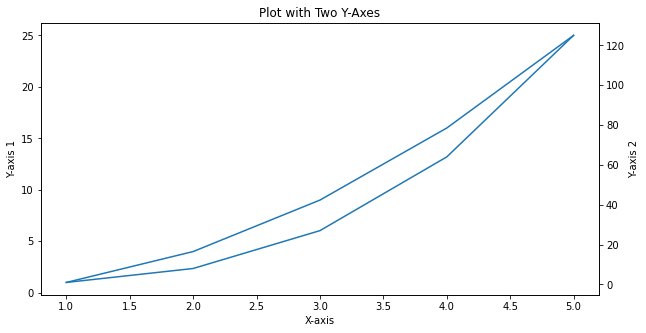

In [12]:
# Create a figure and set its size
fig, ax1 = plt.subplots(figsize=(10,5))

# Set the title and labels for the x and y axes on the first subplot
ax1.set_title("Plot with Two Y-Axes")
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis 1")

# Generate some data and plot it on the first subplot
x1 = [1, 2, 3, 4, 5]
y1 = [1, 4, 9, 16, 25]
ax1.plot(x1, y1)

# Create a second y-axis on the right side of the first subplot
ax2 = ax1.twinx()

# Set the label for the second y-axis
ax2.set_ylabel("Y-axis 2")

# Generate some data and plot it on the second subplot
x2 = [1, 2, 3, 4, 5]
y2 = [1, 8, 27, 64, 125]
ax2.plot(x2, y2)

# Show the plot
plt.show()

In [114]:

plt.clf()
file_name = "D:/User Data/Cheng Yang/Sam files/_switch/data/20221202_FGT/30000Oe_to_0Oe_10.0Ghz_power10dBm_90.0K_1.csv"
df = pd.read_csv(file_name)
df.columns = df.columns.str.strip()

vxx1 = df['x11']
vxy1 = df['x21']
vxx2 = df['y12']
vxy2 = df['y22']
vxx3 = df['x13']
vxy3 = df['x23']
f= df['Field']




plt.figure()
plt.xlabel('field')
plt.ylabel('vxx1')
plt.plot(f,vxx1)
plt.show()
plt.figure()
plt.xlabel('field')
plt.ylabel('vxy1')
plt.plot(f,vxy1)
plt.show()
plt.figure()
plt.xlabel('field')
plt.ylabel('vxx2')
plt.plot(f,vxx2)
plt.show()
plt.figure()
plt.xlabel('field')
plt.ylabel('vxy2')
plt.plot(f,vxy2)
plt.show()
plt.figure()
plt.xlabel('field')
plt.ylabel('vxx3')
plt.plot(f,vxx3)
plt.show()
plt.figure()
plt.xlabel('field')
plt.ylabel('vxy3')
plt.plot(f,vxy3)
plt.show()

KeyError: 'x11'

<Figure size 432x288 with 0 Axes>

In [127]:
file_name

'D:/User Data/Cheng Yang/Sam files/_switch/data/FGT/30000Oe_to_0Oe_2.0Ghz_power10dBm_90.0K_1.csv'

In [63]:
lock1 = Lockin(rm, 1)
B=lock1.lock_in_measure(count=1, time_step=0.1, wait_before_measure=0.0)
print(B)
lock_flag=[]
lock_flag.append(max(abs(B0[0]),abs(B0[1])))

NameError: name 'Lockin' is not defined

In [70]:
Field

[1500,
 1490,
 1480,
 1470,
 1460,
 1450,
 1440,
 1430,
 1420,
 1410,
 1400,
 1390,
 1380,
 1370,
 1360,
 1350,
 1340,
 1330,
 1320,
 1310,
 1300,
 1290,
 1280,
 1270,
 1260,
 1250,
 1240,
 1230,
 1220,
 1210,
 1200,
 1190,
 1180,
 1170,
 1160,
 1150,
 1140,
 1130,
 1120,
 1110,
 1100,
 1090,
 1080,
 1070,
 1060,
 1050,
 1040,
 1030,
 1020,
 1010,
 1000,
 990,
 980,
 970,
 960,
 950,
 940,
 930,
 920,
 910,
 900,
 890,
 880,
 870,
 860,
 850,
 840,
 830,
 820,
 810,
 800,
 790,
 780,
 770,
 760,
 750,
 740,
 730,
 720,
 710,
 700,
 690,
 680,
 670,
 660,
 650,
 640,
 630,
 620,
 610,
 600,
 590,
 580,
 570,
 560,
 550,
 540,
 530,
 520,
 510,
 500,
 490,
 480,
 470,
 460,
 450,
 440,
 430,
 420,
 410,
 400,
 390,
 380,
 370,
 360,
 350,
 340,
 330,
 320,
 310,
 300,
 290,
 280,
 270,
 260,
 250,
 240,
 230,
 220,
 210,
 200,
 190,
 180,
 170,
 160,
 150,
 140,
 130,
 120,
 110,
 100,
 90,
 80,
 70,
 60,
 50,
 40,
 30,
 20]